In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir("/content/drive/My Drive/colab")

['AB_NYC_2019 (1).csv']

In [ ]:
file_path = "/content/drive/My Drive/colab/AB_NYC_2019 (1).csv"
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
cols_to_drop = ["id", "name", "host_name", "last_review"]
df =df.drop(columns=cols_to_drop)
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df = df[(df["price"] > 0) & (df["price"] < 1000)]

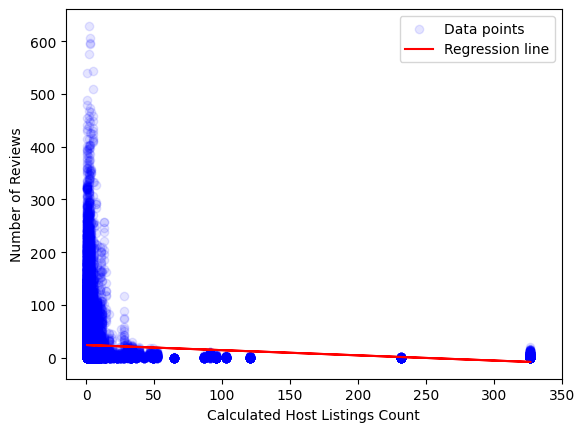

In [ ]:
#select the data used
x = df["calculated_host_listings_count"].values.reshape(-1, 1)
y = df["number_of_reviews"].values

#remove NaN values
mask = ~np.isnan(y)
x = x[mask]
y = y[mask]

#Fit regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="blue", alpha=0.1, label="Data points")
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlim(-15, 350)
plt.xlabel("Calculated Host Listings Count")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

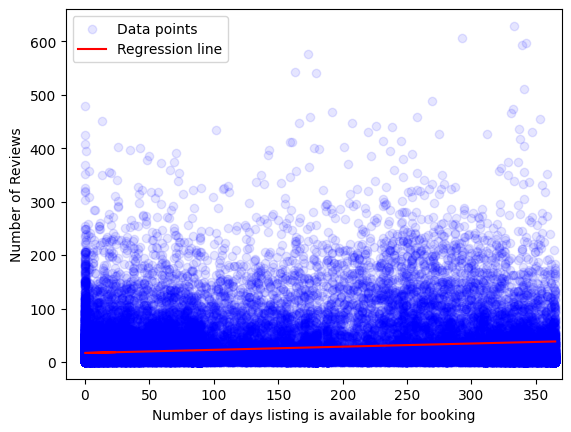

In [ ]:
#select the data used
x = df["availability_365"].values.reshape(-1, 1)
y = df["number_of_reviews"].values

#remove NaN values
mask = ~np.isnan(y)
x = x[mask]
y = y[mask]

#Fit regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, color="blue", alpha=0.1, label="Data points")
plt.plot(x, y_pred, color="red", label="Regression line")
plt.xlim(-15, 370)
plt.xlabel("Number of days listing is available for booking")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()